In [56]:
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
import porepy as pp

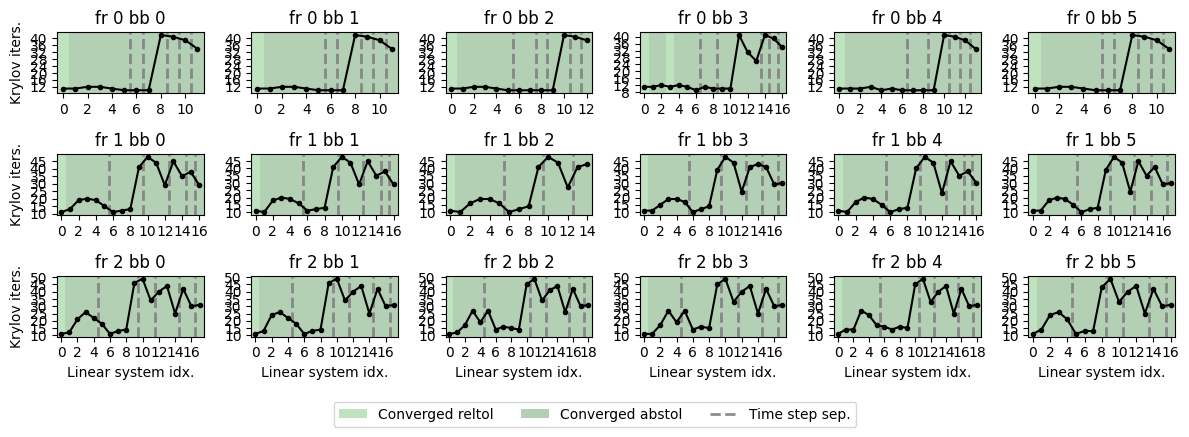

In [59]:
data = {}
names = {}
i = 0
for friction in [0, 1, 2]:
    for barton_bandis in [0, 1, 2, 3, 4, 5]:
        data[i] = load_data(
            f"../stats/stats_geo0x1_sol{1}_ph{0}_bb{barton_bandis}_fr{friction}.json"
        )
        names[i] = f"fr {friction} bb {barton_bandis}"
        i += 1


shape = [3, 6]
figsize = (12, 4)


def render_element(entry: list[TimeStepStats]):
    color_converged_reason(entry)
    # color_sticking_sliding_open(entry)

    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    plt.plot(get_gmres_iterations(entry), marker=".", color="black")


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)

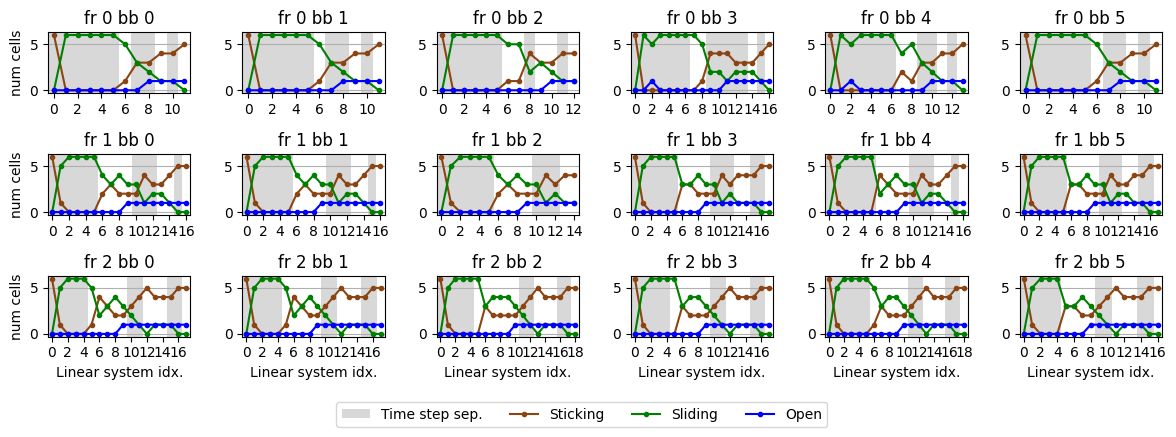

In [60]:
def render_element(i: int, entry: Sequence[TimeStepStats]):
    st, sl, op = get_num_sticking_sliding_open(entry)
    color_time_steps(entry, fill=True, grid=False, legend=True)
    plt.gca().grid(False)
    plt.gca().grid(True, which="major", axis="y")
    plt.plot(st, label="Sticking", marker=".", color=COLOR_STICKING)
    plt.plot(sl, label="Sliding", marker=".", color=COLOR_SLIDING)
    plt.plot(op, label="Open", marker=".", color=COLOR_OPEN)


plot_grid(
    data,
    render_element,
    shape=shape,
    figsize=figsize,
    ylabel="num cells",
    ax_titles=names,
    #   ylabel="Fract. len., m"
)
# plt.savefig(save_path + 'fracture_length.pdf', bbox_inches='tight')

In [ ]:
from collections import defaultdict
import pandas as pd

table = defaultdict(lambda: [])

NDIGITS = 2

barton_bandis = [0, 1, 2, 3, 4, 5]
friction = [0, 1, 2]

table = []
for fr in friction:
    table.append([])
    for bb in barton_bandis:
        entry = load_data(f"../stats/stats_geo0x1_sol{1}_ph{0}_bb{bb}_fr{fr}.json")
        num_gmres = get_gmres_iterations(entry)
        table[-1].append(round(np.mean(num_gmres), 2))

table = pd.DataFrame(
    table,
    index=["$F=0.1$", "$F=0.577$", "$F=0.8$"],
    columns=["BB off", "BB 1e5", "BB 1e9", "BB 1e13", "BB 1e17", "BB 1e20"],
)
table


,BB off,BB 1e5,BB 1e9,BB 1e13,BB 1e17,BB 1e20
$F=0.1$,20.25,20.25,17.62,19.41,18.71,20.25
$F=0.577$,26.00,25.82,24.73,25.94,25.29,25.78
$F=0.8$,27.17,27.39,27.05,27.56,26.68,27.65


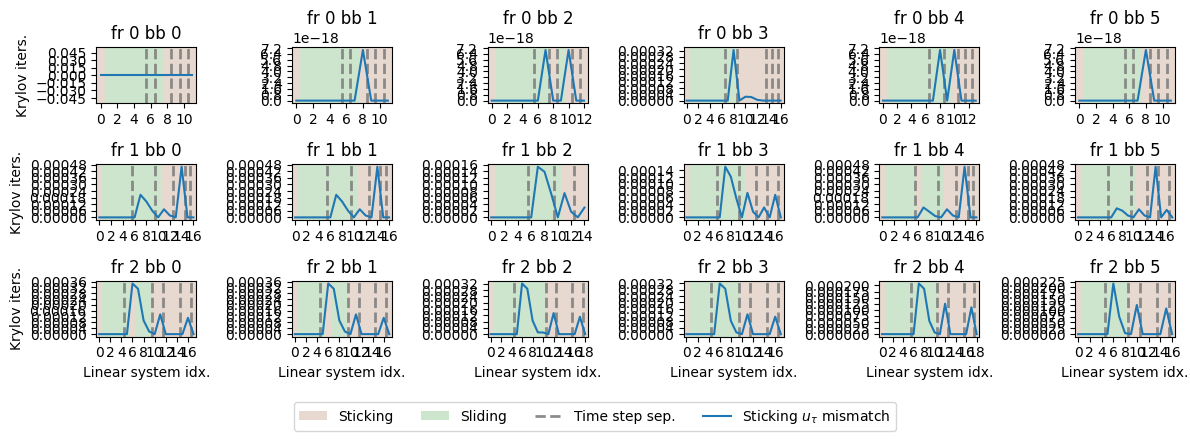

In [72]:
def render_element(entry: list[TimeStepStats]):
    # color_converged_reason(entry)
    color_sticking_sliding_open(entry)
    color_time_steps(entry, fill=False, legend=True)
    plt.gca().grid(False)
    set_integer_ticks("vertical")
    # plt.plot(get_gmres_iterations(entry), marker=".", color="black")

    coulomb_mismatch = [ls.coulomb_mismatch for ts in entry for ls in ts.linear_solves]
    sticking_ut = [ls.sticking_u_mismatch for ts in entry for ls in ts.linear_solves]
    lambdan_max = [ls.lambdan_max for ts in entry for ls in ts.linear_solves]
    lambdan_max[0] = 0
    lambdat_max = [ls.lambdat_max for ts in entry for ls in ts.linear_solves]
    ujumpn_max = [ls.un_max for ts in entry for ls in ts.linear_solves]
    ujumpt_max = [ls.ut_max for ts in entry for ls in ts.linear_solves]
    error_rotation = [ls.error_matrix_contribution for ts in entry for ls in ts.linear_solves]


    # plt.gca().twinx()
    # plt.yscale('log')
    # plt.plot(coulomb_mismatch, label="Coulomb mismatch")  # interesting
    plt.plot(sticking_ut, label=r'Sticking $u_\tau$ mismatch')  # interesting
    # plt.plot(lambdan_max, label=r'$\lambda_n$ max')
    # plt.plot(lambdat_max, label=r'$\lambda_\tau$ max')
    # plt.plot(ujumpn_max, label=r"$u_n$ max")
    # plt.plot(ujumpt_max, label=r'$u_\tau$ max')
    # plt.plot(error_rotation, label="Error matrix contribution")  # interesting
    # plt.ylim(bottom=1e-6)


plot_grid(
    data, render_element, shape=shape, figsize=figsize, legend=True, ax_titles=names
)